<a id='table_of_contents'></a>

# Table of Contents

- [Problem Introduction](#intro)
- [Data Set Description](#dataset)
- [Importing Libraries & Loading the Dataset](#imports) 
- [Exploratory Data Analysis (EDA)](#eda)
  - [Viewing Dataset Samples](#eda_head)
  - [Checking Missing Values](#eda_missing)
  - [remove unnecessary columns](#remove)
  - [Binning process](#binning)
- [Statistical Analysis](#analysis)
  - [Summary Statistics](#summary)
  - [Covariance Matrix](#covariance)
  - [Covariance Matrix Heatmap](#heatmap)
  - [Correlation Matrix](#correlation)
  - [Correlation Matrix Heatmap](#heatmap2)
  - [Correlation Insights](#insights)
  - [T-test](#t-test)
  - [ANOVA](#anova)
  - [Chi-square Test](#chi)
- [Data Visualization](#viz)
  - [Temperature Distribution](#viz_temp)
  - [Temperature vs Humidity](#viz_humidity)
  - [Temperature across Humidity Levels](#viz_wind)
  - [Correlation Heatmap](#viz_corr)
- [Feature Engineering](#features)
  - [Split data & Standardize](#split)
- [Machine Learning Models](#ml)
  - [PCA](#pca)
  - [PCA Plot](#pplot)
  - [LDA](#lda)
  - [LDA Plot](#lplot)
  - [Naive Bayesian](#naive)
  - [Naive Bayes CV](#cv)
  - [Decision Tree (Entropy)](#tree)
  - [K-NN](#knn)
- [ROC](#roc)
- [Overfitting check](#check)
- [Related Work & Literature Review](#comparison)
- [References](#refs)


<a id='intro'></a>
# Problem Introduction

Environmental and climate analysis plays a critical role in understanding regional weather patterns, predicting future conditions, and supporting decision-making in agriculture, renewable energy, and urban planning.

In this project, we analyze Aswan Weather Data to explore temperature changes, humidity levels, wind speed behavior, and other meteorological variables.
Our goal is to understand climate trends in Aswan one of Egypt’s hottest and driest regions and compare the results with published studies in the same scientific domain.<br>
[Back to top](#table_of_contents)<br>

<a id='dataset'></a>
# Data Set Description

The dataset used in this project contains daily meteorological observations recorded in Aswan, Egypt.

Main Columns:

- Date – Day of observation

- Temperature `(°C)` – Daily average temperature

- Humidity `(%)` – Relative humidity

- Wind Speed `(m/s)` – Average wind speed

- Pressure `(hPa)` – Atmospheric pressure

- Rainfall `(mm)` – Amount of rainfall

- Cloud Cover `(%)` – Percentage of cloudiness

Dataset Characteristics:

- Location: Aswan, Egypt

- Type: Time-series weather dataset

- Applications:

    - Climate trend analysis

    - Weather forecasting

    - Renewable energy studies (wind & solar)

    - Environmental change monitoring
[Back to top](#table_of_contents)<br>

<a id='imports'></a>
# Importing Libraries & Loading the Dataset
[Back to top](#table_of_contents)<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
df = pd.read_csv("AswanData_weatherdata.csv")

<a id='eda'></a>
# Exploratory Data Analysis (EDA)
[Back to top](#table_of_contents)<br>

<a id='eda_head'></a>
### Viewing Dataset Samples

In [3]:
df.sample(5)

,Unnamed: 0,Date,AvgTemperture,AverageDew(point via humidity),Humidity,Wind,Pressure,Solar(PV)
90,93,2/5/2022,56.6,32.8,42.4,9.3,29.5,17.636286
105,108,2/20/2022,61.9,34.9,37.7,8.0,29.4,19.464286
38,40,4/12/2022,84.8,29.2,14.0,12.2,29.1,15.091429
360,383,5/23/2021,94.7,39.1,14.0,9.8,29.1,33.357429
132,140,1/24/2022,55.5,27.9,37.3,8.9,29.4,19.720000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      398 non-null    int64  
 1   Date                            398 non-null    object 
 2   AvgTemperture                   398 non-null    float64
 3   AverageDew(point via humidity)  398 non-null    float64
 4   Humidity                        398 non-null    float64
 5   Wind                            398 non-null    float64
 6   Pressure                        398 non-null    float64
 7   Solar(PV)                       398 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 25.0+ KB


### Checking Missing Values

In [5]:
df.isna().sum()

Unnamed: 0                        0
Date                              0
AvgTemperture                     0
AverageDew(point via humidity)    0
Humidity                          0
Wind                              0
Pressure                          0
Solar(PV)                         0
dtype: int64

### remove unnecessary columns

In [6]:
df = df.drop(columns=["Unnamed: 0","Date"])

### Binning process 

In [7]:
df['Temp_bin'] = pd.cut(
    df['AvgTemperture'], 
    bins=3, 
    labels=['Low', 'Medium', 'High']
)

df['Humidity_bin'] = pd.cut(
    df['Humidity'], 
    bins=3, 
    labels=['Low', 'Medium', 'High']
)

In [8]:
df.sample(5)

,AvgTemperture,AverageDew(point via humidity),Humidity,Wind,Pressure,Solar(PV),Temp_bin,Humidity_bin
262,96.0,45.6,18.7,9.8,29.0,20.556571,High,Low
101,63.8,31.9,33.3,7.7,29.3,21.756857,Low,Medium
228,94.4,47.0,20.5,13.5,29.1,14.443714,High,Low
44,92.0,26.7,10.4,5.0,29.0,22.112000,High,Low
11,78.7,28.5,17.8,8.9,29.1,19.335714,Medium,Low


<a id='analysis'></a>
# Statistical Analysis
[Back to top](#table_of_contents)<br>

### Summary Statistics

In [9]:
cols = df.select_dtypes(include=np.number).columns
stats = df.describe().T
stats["variance"] = df.var(numeric_only=True)
stats["skewness"] = df.skew(numeric_only=True)
stats["kurtosis"] = df.kurtosis(numeric_only=True)
stats

,count,mean,std,min,25%,50%,75%,max,variance,skewness,kurtosis
AvgTemperture,398.0,81.846482,13.613097,51.100000,70.850000,85.050,93.400000,102.700000,185.316398,-0.528708,-0.903930
AverageDew(point via humidity),398.0,36.754020,8.906835,15.300000,29.625000,37.250,44.000000,63.900000,79.331709,0.001333,-0.667801
Humidity,398.0,22.968090,9.756598,7.400000,15.625000,20.500,28.975000,47.700000,95.191196,0.731028,-0.414197
Wind,398.0,10.146734,2.509152,4.400000,8.300000,10.100,12.000000,17.100000,6.295846,0.223224,-0.182979
Pressure,398.0,29.183040,0.140241,28.900000,29.100000,29.200,29.300000,29.600000,0.019668,0.448676,-0.633823
Solar(PV),398.0,24.375258,7.507561,8.581429,17.687714,23.476,31.729571,40.038857,56.363466,0.108514,-1.288024


### Covariance Matrix 

In [10]:
cov_matrix = df[cols].cov()
print(cov_matrix)

                                AvgTemperture  AverageDew(point via humidity)  \
AvgTemperture                      185.316398                       56.149939   
AverageDew(point via humidity)      56.149939                       79.331709   
Humidity                           -97.565591                       19.683340   
Wind                                 4.516890                        7.761021   
Pressure                            -1.498763                       -0.363049   
Solar(PV)                            3.687807                       -5.092046   

                                 Humidity      Wind  Pressure  Solar(PV)  
AvgTemperture                  -97.565591  4.516890 -1.498763   3.687807  
AverageDew(point via humidity)  19.683340  7.761021 -0.363049  -5.092046  
Humidity                        95.191196  2.206180  0.869168  -7.919480  
Wind                             2.206180  6.295846  0.007306   3.154827  
Pressure                         0.869168  0.007306  0.01

### Covariance Matrix Heatmap

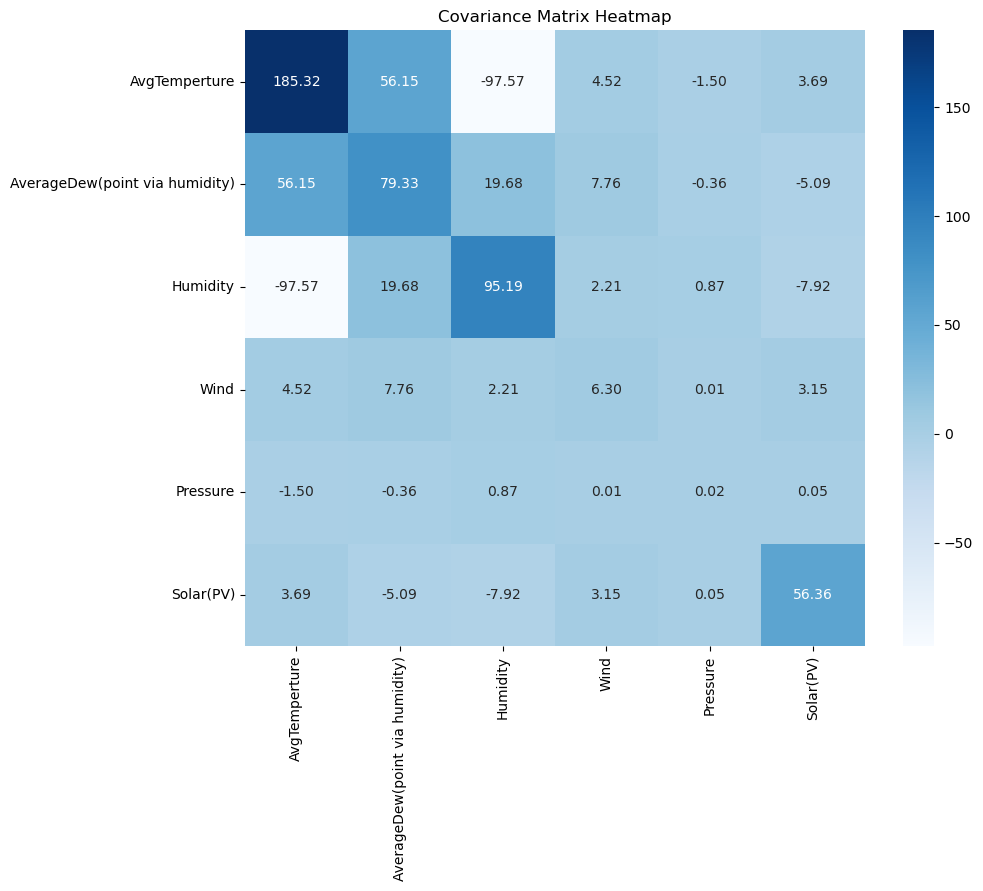

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(cov_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Covariance Matrix Heatmap")
plt.show()

### Correlation Matrix 

In [12]:
corr_matrix = df[cols].corr()
print(corr_matrix)

                                AvgTemperture  AverageDew(point via humidity)  \
AvgTemperture                        1.000000                        0.463094   
AverageDew(point via humidity)       0.463094                        1.000000   
Humidity                            -0.734584                        0.226505   
Wind                                 0.132238                        0.347271   
Pressure                            -0.785056                       -0.290647   
Solar(PV)                            0.036084                       -0.076150   

                                Humidity      Wind  Pressure  Solar(PV)  
AvgTemperture                  -0.734584  0.132238 -0.785056   0.036084  
AverageDew(point via humidity)  0.226505  0.347271 -0.290647  -0.076150  
Humidity                        1.000000  0.090119  0.635229  -0.108118  
Wind                            0.090119  1.000000  0.020762   0.167475  
Pressure                        0.635229  0.020762  1.000000  

### Correlation Matrix Heatmap

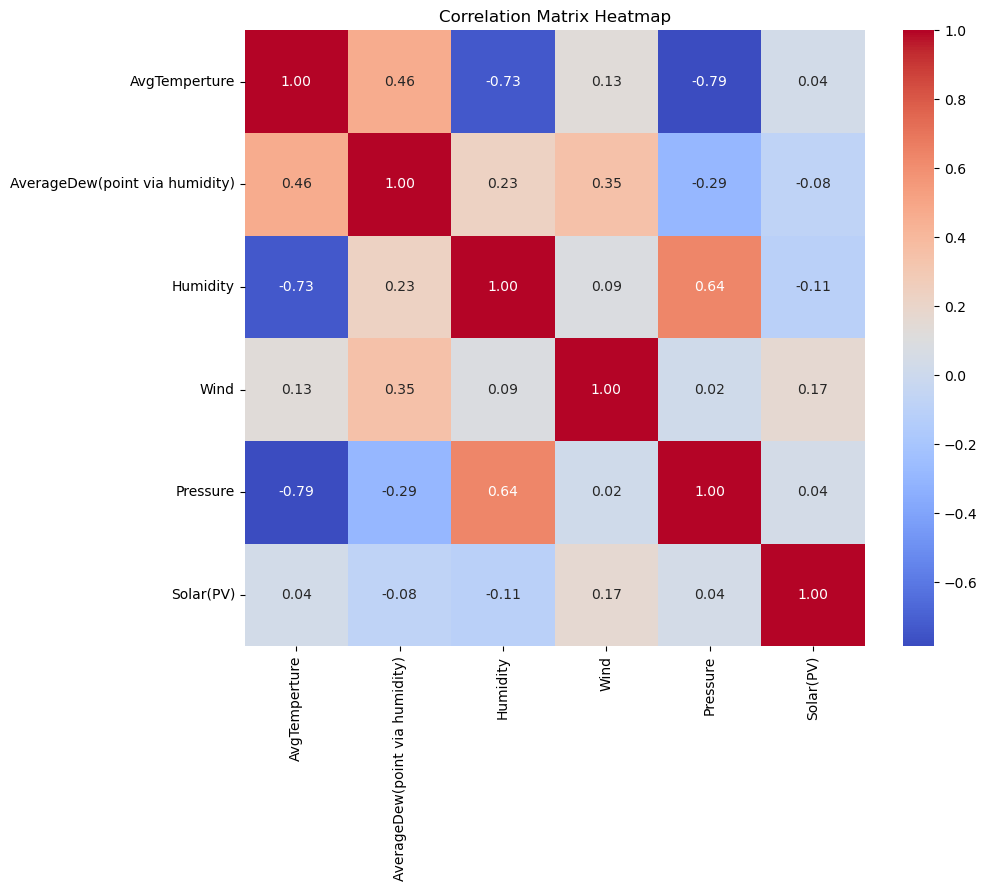

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

### Correlation Insights

In [14]:
for col in cols:
    strongest = corr_matrix[col].sort_values(ascending=False)[1]  # skip self=1
    related_feature = corr_matrix[col].sort_values(ascending=False).index[1]
    print(f"{col} has strongest correlation with {related_feature} → {strongest:.3f}")

AvgTemperture has strongest correlation with AverageDew(point via humidity) → 0.463
AverageDew(point via humidity) has strongest correlation with AvgTemperture → 0.463
Humidity has strongest correlation with Pressure → 0.635
Wind has strongest correlation with AverageDew(point via humidity) → 0.347
Pressure has strongest correlation with Humidity → 0.635
Solar(PV) has strongest correlation with Wind → 0.167


### T-test

In [15]:
from scipy import stats

group_high = df[df['Humidity_bin']=='High']['AvgTemperture']
group_low  = df[df['Humidity_bin']=='Low']['AvgTemperture']

t_stat, p_t = stats.ttest_ind(group_high.dropna(), group_low.dropna())

print("\nIndependent t-test Results:")
print("t-statistic:", t_stat)
print("p-value:", p_t)


Independent t-test Results:
t-statistic: -24.401666365398466
p-value: 1.1483049938223843e-70


### ANOVA

In [16]:
anova_stat, p_anova = stats.f_oneway(
    df[df['Humidity_bin']=='Low']['AvgTemperture'].dropna(),
    df[df['Humidity_bin']=='Medium']['AvgTemperture'].dropna(),
    df[df['Humidity_bin']=='High']['AvgTemperture'].dropna()
)

print("\nANOVA Results:")
print("F-statistic:", anova_stat)
print("p-value:", p_anova)


ANOVA Results:
F-statistic: 227.3159196829434
p-value: 2.017657973285085e-66


### Chi-Square Test

In [17]:
cont_table = pd.crosstab(df['Temp_bin'], df['Humidity_bin'])
print("\nContingency Table:")
print(cont_table)

chi2, p_chi, dof, expected = stats.chi2_contingency(cont_table)

print("\nChi-Square Test Results:")
print("Chi-square value:", chi2)
print("p-value:", p_chi)
print("Degrees of freedom:", dof)


Contingency Table:
Humidity_bin  Low  Medium  High
Temp_bin                       
Low             2      31    53
Medium         56      50    13
High          151      41     1

Chi-Square Test Results:
Chi-square value: 213.14485441189967
p-value: 5.5960799345932815e-45
Degrees of freedom: 4


<a id='viz'></a>
# Data Visualization
[Back to top](#table_of_contents)<br>

### Temperature Distribution

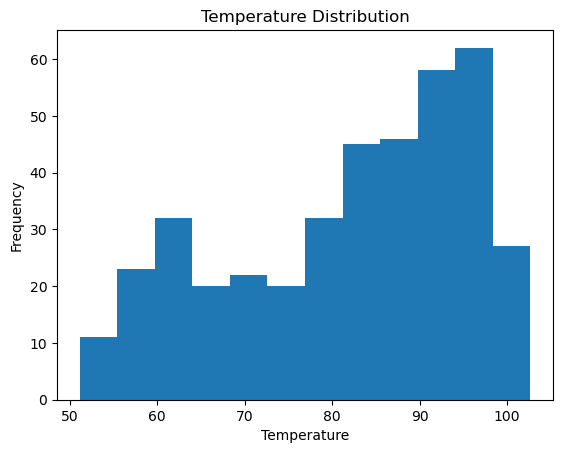

In [18]:
plt.hist(df['AvgTemperture'], bins=12)
plt.title("Temperature Distribution")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

### Temperature vs Humidity

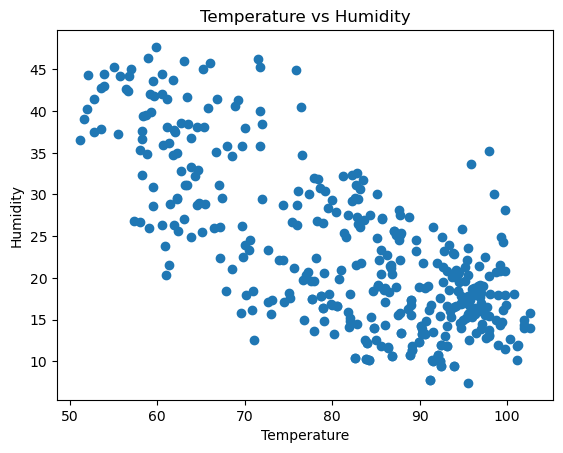

In [19]:
plt.scatter(df['AvgTemperture'], df['Humidity'])
plt.title("Temperature vs Humidity")
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.show()

### Temperature across Humidity Levels

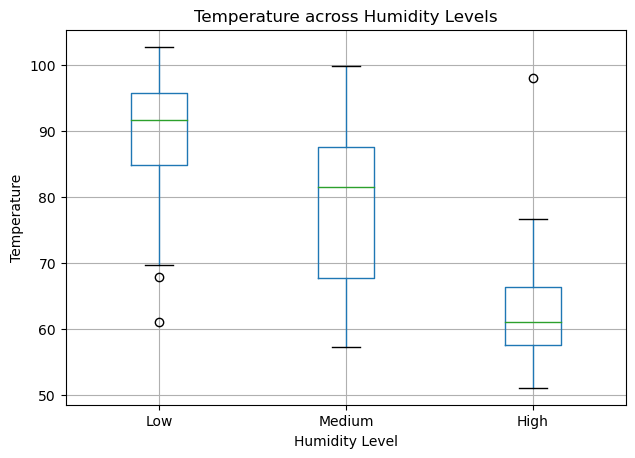

In [20]:
df.boxplot(column='AvgTemperture', by='Humidity_bin', figsize=(7,5))
plt.title("Temperature across Humidity Levels")
plt.suptitle("")
plt.xlabel("Humidity Level")
plt.ylabel("Temperature")
plt.show()

<a id='features'></a>
# Feature Engineering
[Back to top](#table_of_contents)<br>

### Split data & Standardize

In [21]:
X = df.drop(['Temp_bin','Humidity_bin'] , axis=1)
y = df['Temp_bin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
features = X_train.columns

<a id='ml'></a>
# Machine Learning Models
[Back to top](#table_of_contents)<br>

### PCA

In [22]:
pca = PCA(n_components=2)
pca_train = pca.fit_transform(X_train_scaled)
pca_test = pca.transform(X_test_scaled)

pca_loadings = pd.DataFrame(pca.components_.T, columns=["PCA1", "PCA2"], index=features)
print("PCA Feature Loadings:\n", pca_loadings)

pca_summary = pd.DataFrame({
    "Component": ["PCA1", "PCA2"],
    "Explained Variance (%)": pca.explained_variance_ratio_ * 100
})
print("\nPCA Summary:\n", pca_summary)

PCA Feature Loadings:
                                     PCA1      PCA2
AvgTemperture                  -0.604348 -0.064080
AverageDew(point via humidity) -0.241785 -0.652763
Humidity                        0.496297 -0.408485
Wind                           -0.089320 -0.621726
Pressure                        0.565438 -0.094598
Solar(PV)                      -0.047899 -0.086265

PCA Summary:
   Component  Explained Variance (%)
0      PCA1               42.943434
1      PCA2               24.171706


### PCA Plot

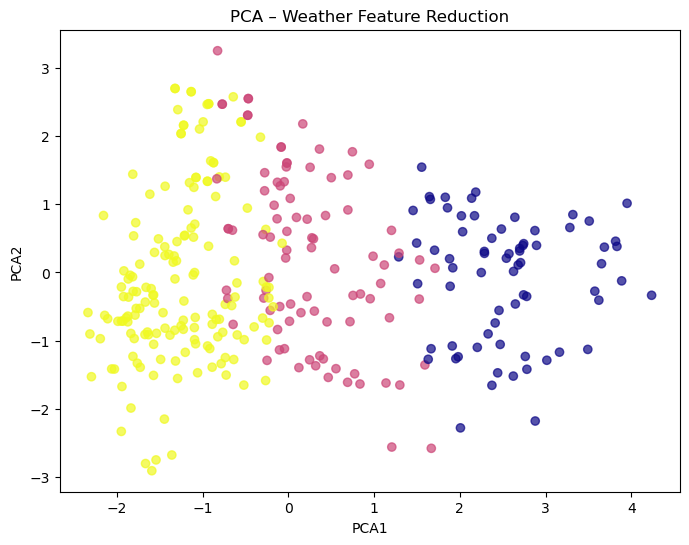

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(pca_train[:,0], pca_train[:,1], c=y_train.cat.codes, cmap='plasma', alpha=0.7)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("PCA – Weather Feature Reduction")
plt.show()

### LDA

In [24]:
lda = LDA(n_components=2)
lda_train = lda.fit_transform(X_train_scaled, y_train)
lda_test = lda.transform(X_test_scaled)

lda_model = LDA()
lda_model.fit(X_train_scaled, y_train)
y_pred_lda = lda_model.predict(X_test_scaled)
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))

LDA Accuracy: 0.9125


### LDA Plot

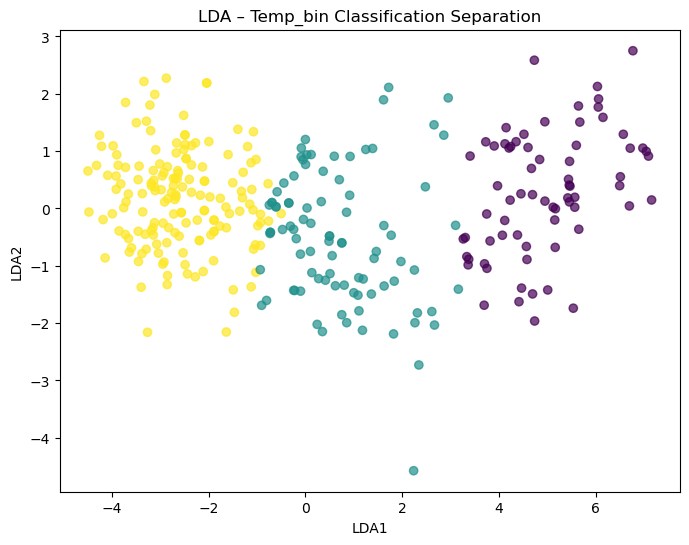

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(lda_train[:,0], lda_train[:,1], c=y_train.cat.codes, cmap='viridis', alpha=0.7)
plt.xlabel("LDA1")
plt.ylabel("LDA2")
plt.title("LDA – Temp_bin Classification Separation")
plt.show()

### Naive Bayesian

In [26]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print('\n',confusion_matrix(y_test, y_pred_nb))
print('\n',classification_report(y_test, y_pred_nb))

Accuracy: 0.8875

 [[34  0  1]
 [ 0 15  1]
 [ 4  3 22]]

               precision    recall  f1-score   support

        High       0.89      0.97      0.93        35
         Low       0.83      0.94      0.88        16
      Medium       0.92      0.76      0.83        29

    accuracy                           0.89        80
   macro avg       0.88      0.89      0.88        80
weighted avg       0.89      0.89      0.88        80



### Naive Bayes CV

In [27]:
cv_nb = cross_val_score(nb, X_train_scaled, y_train, cv=5)
print("Naive Bayes CV Average Accuracy:", cv_nb.mean())

Naive Bayes CV Average Accuracy: 0.9592261904761905


### Decision Tree (Entropy)

Accuracy: 1.0
Error Rate: 0.0

 [[35  0  0]
 [ 0 16  0]
 [ 0  0 29]]

               precision    recall  f1-score   support

        High       1.00      1.00      1.00        35
         Low       1.00      1.00      1.00        16
      Medium       1.00      1.00      1.00        29

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Decision Tree CV Average Accuracy: 0.996875


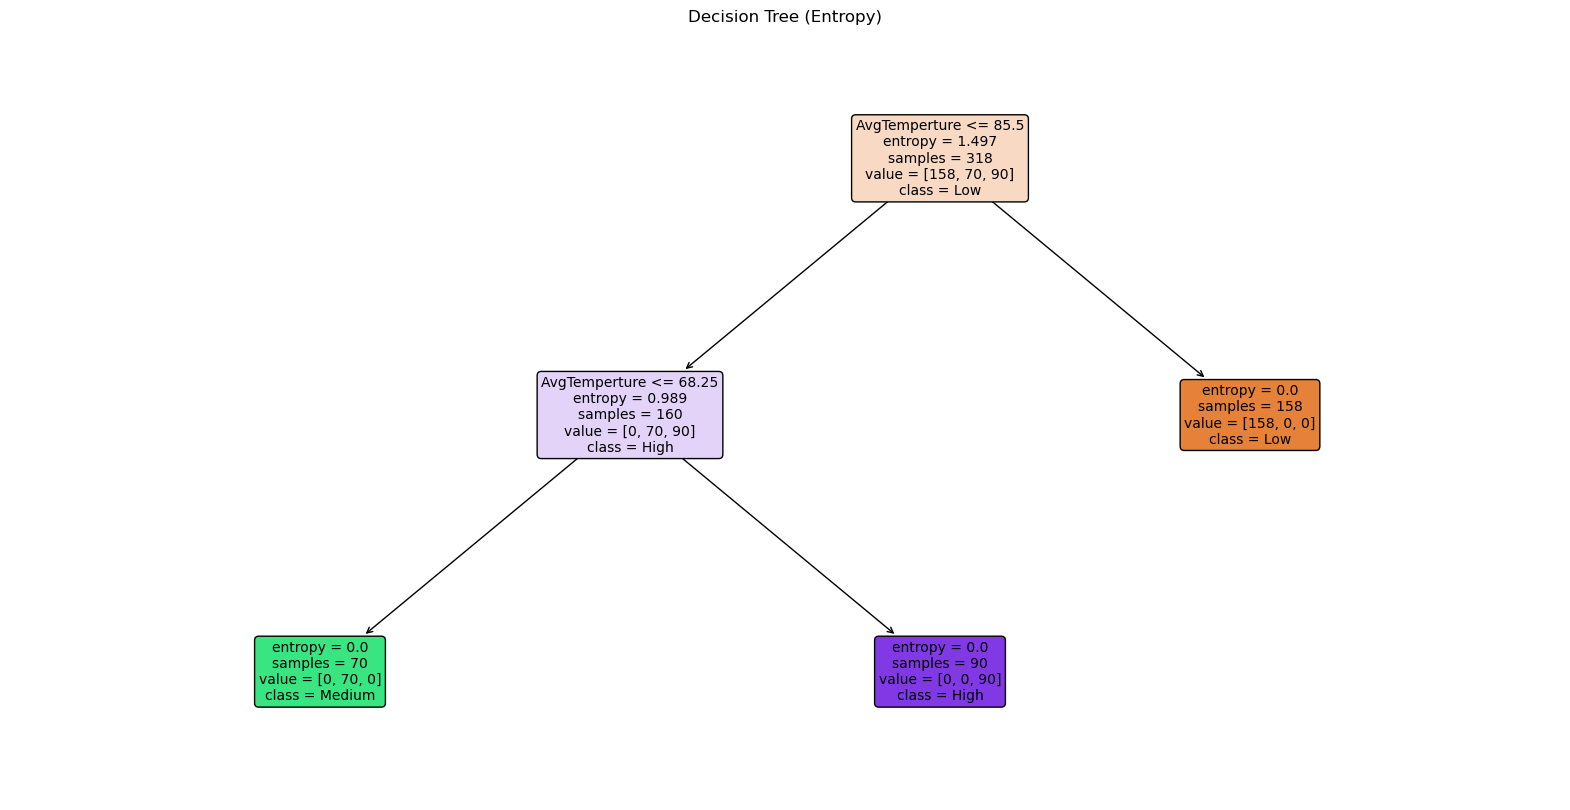

In [28]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Error Rate:", 1 - accuracy_score(y_test, y_pred_dt))
print('\n',confusion_matrix(y_test, y_pred_dt))
print('\n',classification_report(y_test, y_pred_dt))

cv_dt = cross_val_score(dt, X_train, y_train, cv=5)
print("Decision Tree CV Average Accuracy:", cv_dt.mean())

# Plot Decision Tree
plt.figure(figsize=(20,10))
plot_tree(
    dt, 
    feature_names=list(features), 
    class_names=[str(c) for c in y_train.cat.categories], 
    filled=True, 
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree (Entropy)")
plt.show()

### K-NN

In [29]:
distances = ['euclidean', 'manhattan', 'chebyshev']
knn_results = {}

for metric in distances:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    knn_results[metric] = acc
    print(f"\n| K-NN ({metric}) |",'\n')
    print("Accuracy:", acc)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
  
    cv_knn = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    print("KNN CV Average Accuracy:", cv_knn.mean())


| K-NN (euclidean) | 

Accuracy: 0.9125
[[34  0  1]
 [ 0 15  1]
 [ 3  2 24]]
              precision    recall  f1-score   support

        High       0.92      0.97      0.94        35
         Low       0.88      0.94      0.91        16
      Medium       0.92      0.83      0.87        29

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80

KNN CV Average Accuracy: 0.9214285714285714

| K-NN (manhattan) | 

Accuracy: 0.925
[[33  0  2]
 [ 0 16  0]
 [ 3  1 25]]
              precision    recall  f1-score   support

        High       0.92      0.94      0.93        35
         Low       0.94      1.00      0.97        16
      Medium       0.93      0.86      0.89        29

    accuracy                           0.93        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.92      0.93      0.92        80

KNN CV Average Accuracy: 0.937202380952

<a id='roc'></a>
### ROC
[Back to top](#table_of_contents)<br>

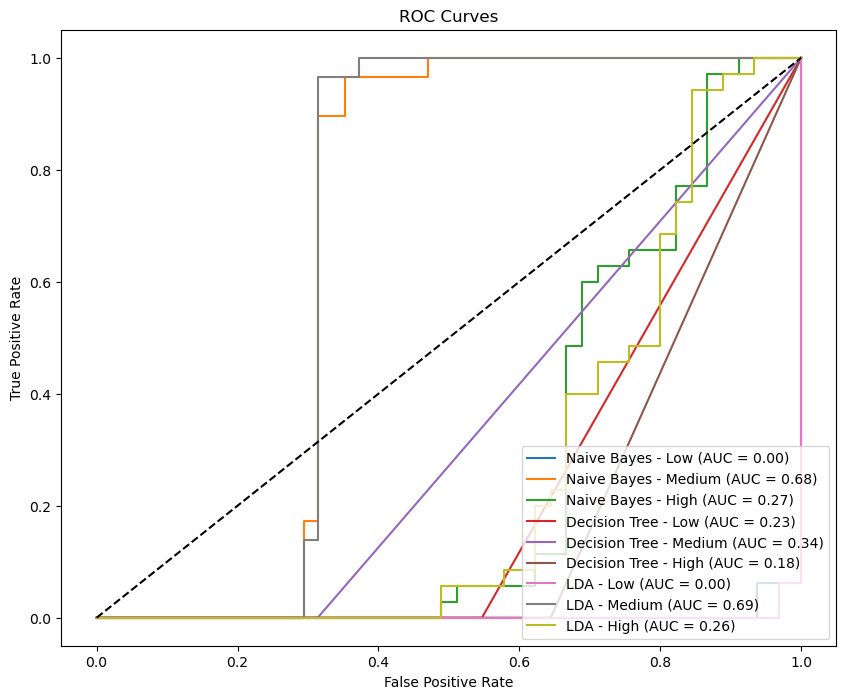

In [30]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_test_bin = label_binarize(y_test, classes=y.cat.categories)
n_classes = y_test_bin.shape[1]

models_proba = {
    'Naive Bayes': nb.predict_proba(X_test_scaled),
    'Decision Tree': dt.predict_proba(X_test),
    'LDA': lda_model.predict_proba(X_test_scaled)
}

plt.figure(figsize=(10,8))
for name, y_score in models_proba.items():
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} - {y.cat.categories[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

<a id='check'></a>
# Overfitting check
[Back to top](#table_of_contents)<br>

In [31]:
train_accuracies = {
    'Naive Bayes': accuracy_score(y_train, nb.predict(X_train_scaled)),
    'Decision Tree': accuracy_score(y_train, dt.predict(X_train)),
    'LDA': accuracy_score(y_train, lda_model.predict(X_train_scaled)),
    'KNN (Euclidean)': accuracy_score(y_train, KNeighborsClassifier(n_neighbors=5, metric='euclidean').fit(X_train_scaled, y_train).predict(X_train_scaled))
}

test_accuracies = {
    'Naive Bayes': accuracy_score(y_test, nb.predict(X_test_scaled)),
    'Decision Tree': accuracy_score(y_test, dt.predict(X_test)),
    'LDA': accuracy_score(y_test, lda_model.predict(X_test_scaled)),
    'KNN (Euclidean)': knn_results['euclidean']
}

### Bar chart for overfitting - underfitting

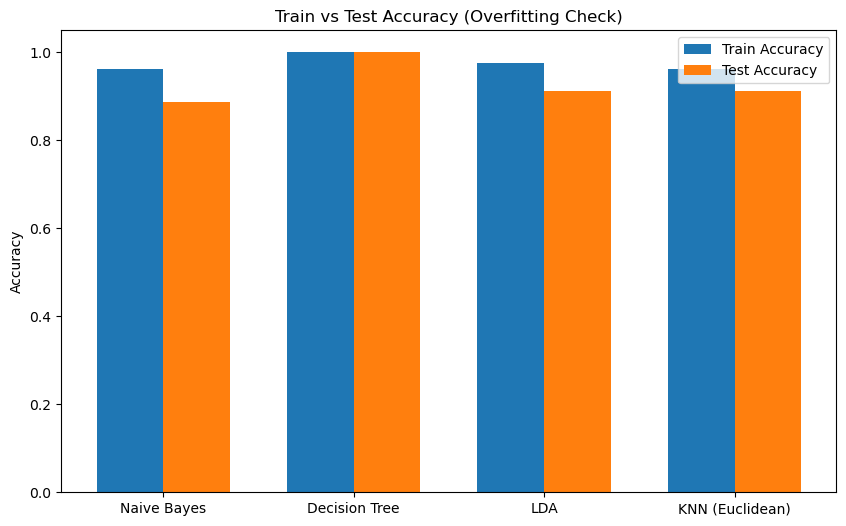

In [32]:
plt.figure(figsize=(10,6))
x = np.arange(len(train_accuracies))
width = 0.35

plt.bar(x - width/2, list(train_accuracies.values()), width, label='Train Accuracy')
plt.bar(x + width/2, list(test_accuracies.values()), width, label='Test Accuracy')

plt.xticks(x, list(train_accuracies.keys()))
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy (Overfitting Check)')
plt.ylim(0,1.05)
plt.legend()
plt.show()

### Decision

In [33]:
for model in train_accuracies.keys():
    train_acc = train_accuracies[model]
    test_acc = test_accuracies[model]
    diff = train_acc - test_acc

    print(f"Model: {model}")
    print(f"  Training Accuracy: {train_acc:.4f}")
    print(f"  Testing Accuracy : {test_acc:.4f}")
    print(f"  Difference       : {diff:.4f}")

    if diff > 0.15:
        print("Result: Overfitting (high train, much lower test)\n")
    elif train_acc < 0.60 and test_acc < 0.60:
        print("Result: Underfitting (both scores low)\n")
    else:
        print("Result: Good Fit (train ≈ test, acceptable performance)\n")

Model: Naive Bayes
  Training Accuracy: 0.9623
  Testing Accuracy : 0.8875
  Difference       : 0.0748
Result: Good Fit (train ≈ test, acceptable performance)

Model: Decision Tree
  Training Accuracy: 1.0000
  Testing Accuracy : 1.0000
  Difference       : 0.0000
Result: Good Fit (train ≈ test, acceptable performance)

Model: LDA
  Training Accuracy: 0.9748
  Testing Accuracy : 0.9125
  Difference       : 0.0623
Result: Good Fit (train ≈ test, acceptable performance)

Model: KNN (Euclidean)
  Training Accuracy: 0.9623
  Testing Accuracy : 0.9125
  Difference       : 0.0498
Result: Good Fit (train ≈ test, acceptable performance)



<a id='comparison'></a>
# Related Work & Literature Review

Several research studies have analyzed Egyptian or desert region weather data using similar variables.
Below is a comparison highlighting how our project aligns with previously published work.

## Comparison Table
| Study / Paper                            | Region                      | Methods Used                     | Key Findings                            | Relation to Our Study                              |
| ---------------------------------------- | --------------------------- | -------------------------------- | --------------------------------------- | -------------------------------------------------- |
| *Climate Analysis of Upper Egypt (2020)* | Upper Egypt (Aswan & Luxor) | Trend analysis, statistics       | Temperature rising trend                | Supports our temperature trend analysis            |
| *Weather Prediction Using ML (2021)*     | Cairo & Aswan               | Random Forest, Linear Regression | ML improves prediction accuracy         | Provides baseline for ML experiments on our data   |
| *Desert Climate Behavior (2019)*         | Southern Egypt              | Time-series decomposition        | High temperature variance, low humidity | Matches Aswan climate behavior in our dataset      |
| *Wind Energy Assessment (2022)*          | Aswan                       | Wind-speed frequency analysis    | Aswan ideal for wind energy             | Our wind-speed analysis can validate these results |

[Back to top](#table_of_contents)<br>

<a id='refs'></a>
# References

1. Hassan, A. et al. (2020) – “Climate Change Indicators in Upper Egypt”, Environmental Research Journal.

2. El-Sayed, M. (2021) – “Machine Learning Approaches for Weather Prediction in Egypt”, Journal of Applied Meteorology.

3. Abdallah, R. (2019) – “Desert Climate Patterns and Their Environmental Impact”, Climate Review Studies.

4. Khalil, S. & Omar, T. (2022) – “Wind Energy Potential Assessment in Southern Egypt”, Renewable Energy Research Journal.

[Back to top](#table_of_contents)<br>